In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [8]:
# Cell 3: Paths and parameters
raw_data_path = 'D:/perg/data/raw'
processed_data_path = 'D:/perg/data/processed'
sampling_rate = 1700  # Hz as per dataset documentation
lowcut = 1.0          # Hz (cut-off for bandpass filter)
highcut = 100.0       # Hz

In [9]:
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [10]:
if not os.path.exists(processed_data_path):
    os.makedirs(processed_data_path)

In [11]:
example_signal_file = os.path.join(raw_data_path, '0001.csv')
df = pd.read_csv(example_signal_file)
print(df.head())

                     TIME_1  RE_1  LE_1
0  2016-09-15 09:40:21.0000   0.0   0.0
1  2016-09-15 09:40:21.0006  -0.1   0.1
2  2016-09-15 09:40:21.0012  -0.2   0.2
3  2016-09-15 09:40:21.0018  -0.2   0.4
4  2016-09-15 09:40:21.0024  -0.2   0.6


In [12]:
# Basic signal preprocessing example (right eye RE_1)
signal = df['RE_1'].values

In [13]:
# Apply bandpass filter
filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_rate)

# Normalize (z-score)
normalized_signal = (filtered_signal - np.mean(filtered_signal)) / np.std(filtered_signal)

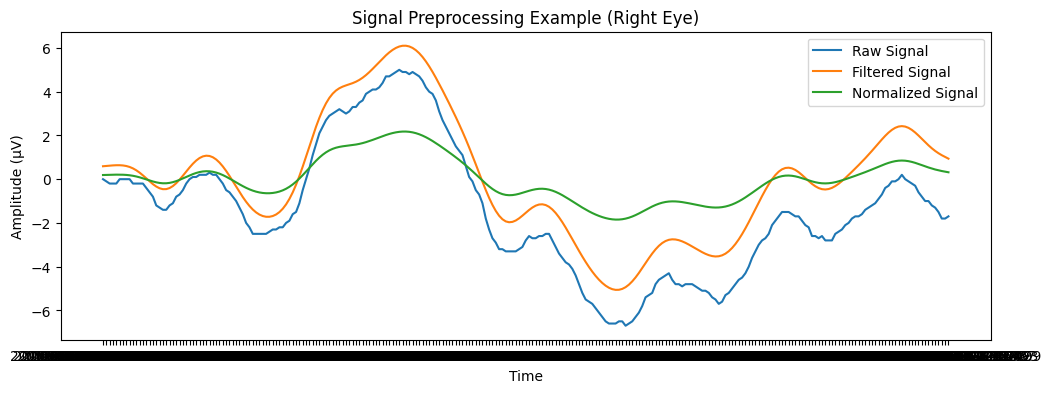

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(df['TIME_1'], signal, label='Raw Signal')
plt.plot(df['TIME_1'], filtered_signal, label='Filtered Signal')
plt.plot(df['TIME_1'], normalized_signal, label='Normalized Signal')
plt.legend()
plt.title('Signal Preprocessing Example (Right Eye)')
plt.xlabel('Time')
plt.ylabel('Amplitude (μV)')
plt.show()

In [15]:
def preprocess_perg_file(input_filepath, lowcut=0.1, highcut=30, sampling_rate=1000):
    # Read file (csv or xlsx)
    if input_filepath.endswith('.xlsx'):
        df = pd.read_excel(input_filepath)
    elif input_filepath.endswith('.csv'):
        df = pd.read_csv(input_filepath)
    else:
        raise ValueError(f"Unsupported file type: {input_filepath}")

    # Automatically detect all eye signal columns (RE_x, LE_x)
    eye_columns = [col for col in df.columns if col.startswith(('RE_', 'LE_')) and not col.endswith('_processed')]

    for eye in eye_columns:
        signal = df[eye].values
        filtered = bandpass_filter(signal, lowcut, highcut, sampling_rate)
        normalized = (filtered - np.mean(filtered)) / np.std(filtered)
        df[eye + '_processed'] = normalized

    return df

In [16]:
processed_dir = os.path.join(processed_data_path, 'all_processed')
os.makedirs(processed_dir, exist_ok=True)

for file in os.listdir(raw_data_path):
    if file.endswith('.csv') or file.endswith('.xlsx'):
        filepath = os.path.join(raw_data_path, file)
        processed_df = preprocess_perg_file(filepath)
        save_path = os.path.join(processed_dir, file.replace('.xlsx','.csv').replace('.CSV','.csv'))
        processed_df.to_csv(save_path, index=False)
        print(f'Processed and saved: {save_path}')

Processed and saved: D:/perg/data/processed\all_processed\0001.csv
Processed and saved: D:/perg/data/processed\all_processed\0002.csv
Processed and saved: D:/perg/data/processed\all_processed\0003.csv
Processed and saved: D:/perg/data/processed\all_processed\0004.csv
Processed and saved: D:/perg/data/processed\all_processed\0005.csv
Processed and saved: D:/perg/data/processed\all_processed\0006.csv
Processed and saved: D:/perg/data/processed\all_processed\0007.csv
Processed and saved: D:/perg/data/processed\all_processed\0008.csv
Processed and saved: D:/perg/data/processed\all_processed\0009.csv
Processed and saved: D:/perg/data/processed\all_processed\0010.csv
Processed and saved: D:/perg/data/processed\all_processed\0011.csv
Processed and saved: D:/perg/data/processed\all_processed\0012.csv
Processed and saved: D:/perg/data/processed\all_processed\0013.csv
Processed and saved: D:/perg/data/processed\all_processed\0014.csv
Processed and saved: D:/perg/data/processed\all_processed\0015